<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load 'german_credit_data.csv' and store it in a dataframe

In [2]:
df = pd.read_csv('german_credit_data.csv' )
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


#### View top 5 rows

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

In [4]:
df.shape

(1000, 11)

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

#### Fill all null objects with 'Unknown'

In [7]:
df = df.fillna('Unknown')
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Unique elements in each column

In [8]:
for i in df.columns:
    print(f'Unique values in {i}: {df[i].unique()}')

Unique values in Unnamed: 0: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 2

##### Create a New column Id by replacing unnamed column

In [9]:
df = df.rename(columns={'Unnamed: 0':'Id'})

In [10]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Find the information of the dataset


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [12]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Fetch the following groupby results

In [13]:
df.groupby(['Sex','Risk']).Purpose.value_counts()

Sex     Risk  Purpose            
female  bad   car                     40
              furniture/equipment     28
              radio/TV                19
              education                9
              business                 7
              domestic appliances      2
              repairs                  2
              vacation/others          2
        good  radio/TV                66
              car                     54
              furniture/equipment     46
              education               15
              business                12
              domestic appliances      4
              repairs                  3
              vacation/others          1
male    bad   car                     66
              radio/TV                43
              furniture/equipment     30
              business                27
              education               14
              repairs                  6
              vacation/others          3
              domestic 

In [14]:
df.groupby(['Purpose','Risk']).Sex.value_counts()

Purpose              Risk  Sex   
business             bad   male       27
                           female      7
                     good  male       51
                           female     12
car                  bad   male       66
                           female     40
                     good  male      177
                           female     54
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   male       14
                           female      9
                     good  male       21
                           female     15
furniture/equipment  bad   male       30
                           female     28
                     good  male       77
                           female     46
radio/TV             bad   male       43
                           female     19
                     good  male      152
                       

## <span style = "color: orange"> Data Visualization </span>

#### Plot the graphs shown below

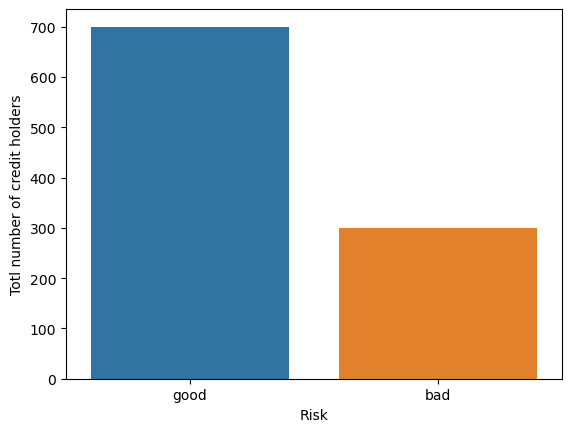

In [15]:
sns.countplot(x = df['Risk'])
plt.ylabel('Totl number of credit holders')
plt.show()

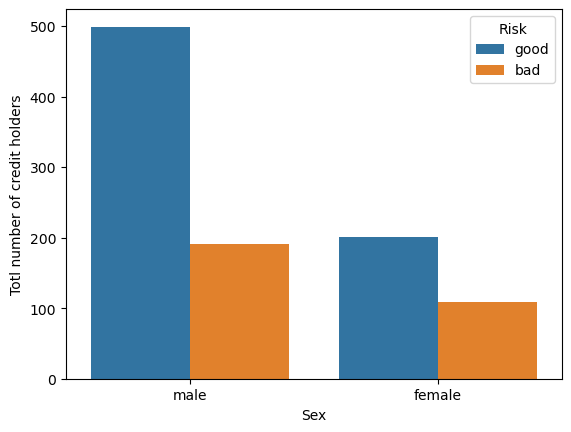

In [16]:
sns.countplot(x = df['Sex'], hue = df['Risk'])
plt.ylabel('Totl number of credit holders')
plt.show()

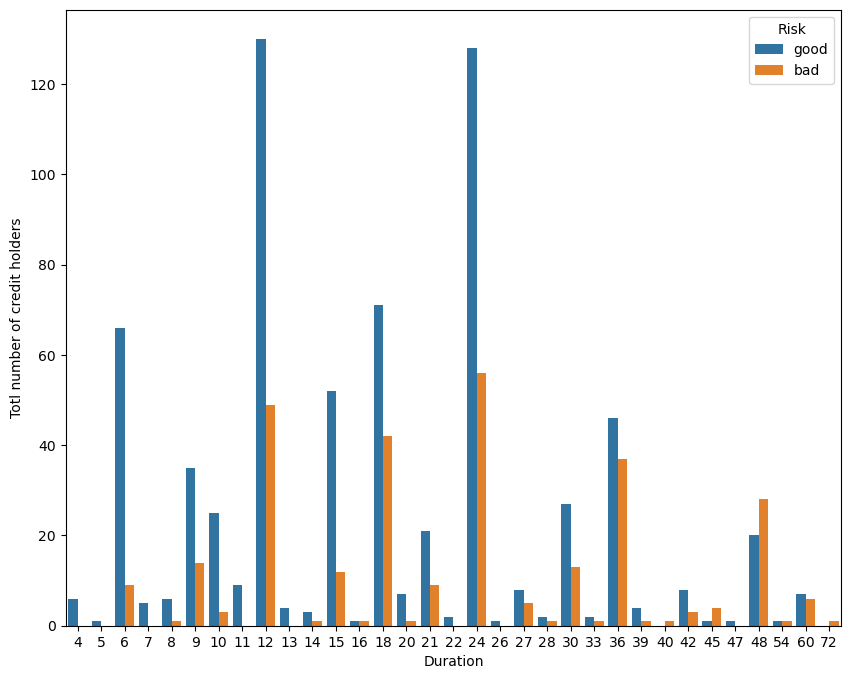

In [17]:
plt.figure(figsize = (10,8))
sns.countplot(x = df['Duration'], hue = df['Risk'])
plt.ylabel('Totl number of credit holders')
plt.show()

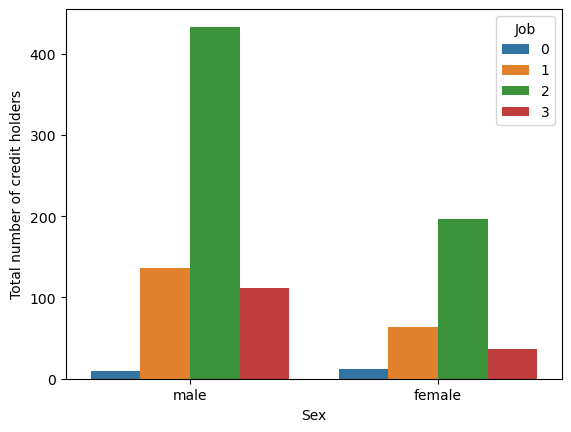

In [18]:
sns.countplot(x = df['Sex'], hue = df['Job'])
plt.ylabel('Total number of credit holders')
plt.show()

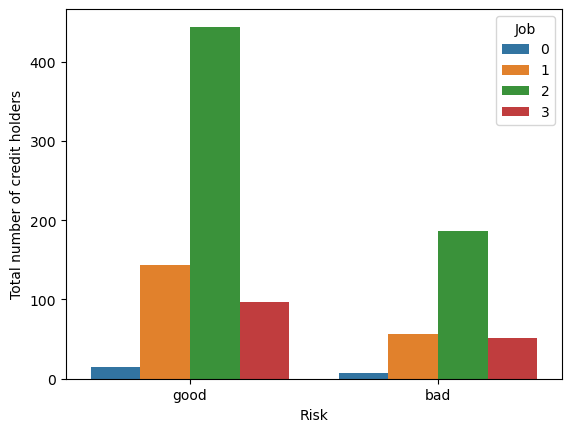

In [19]:
sns.countplot(x = df['Risk'], hue = df['Job'])
plt.ylabel('Total number of credit holders')
plt.show()

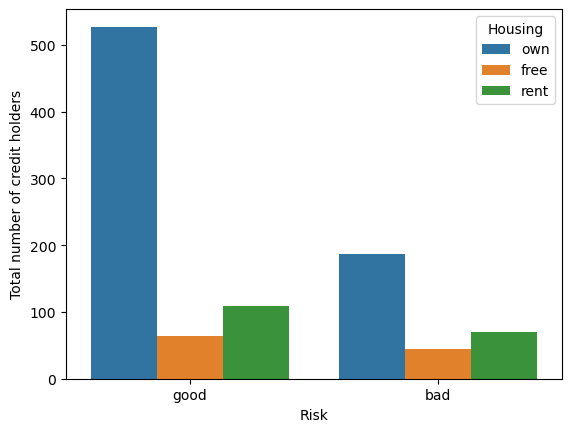

In [20]:
sns.countplot(x = df['Risk'], hue = df['Housing'])
plt.ylabel('Total number of credit holders')
plt.show()

In [22]:
a = df['Purpose'].unique()

In [23]:
list(enumerate(a))

[(0, 'radio/TV'),
 (1, 'education'),
 (2, 'furniture/equipment'),
 (3, 'car'),
 (4, 'business'),
 (5, 'domestic appliances'),
 (6, 'repairs'),
 (7, 'vacation/others')]

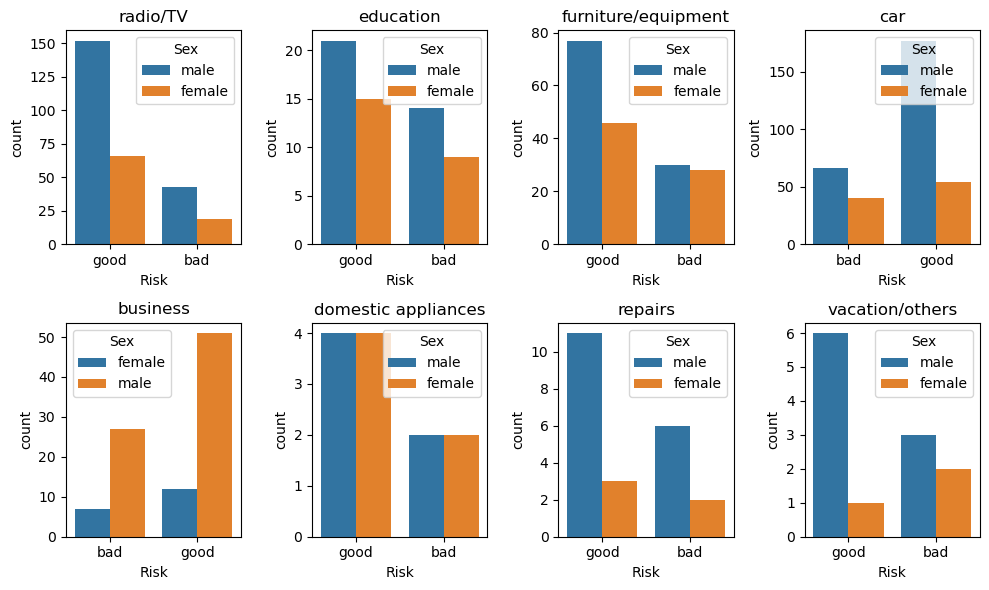

In [25]:
plt.figure(figsize = (10,6))
for i in enumerate(a):
    plt.subplot(2,4,i[0]+1)
    sns.countplot(x = df[df['Purpose'] == i[1]]['Risk'], hue = df[df['Purpose'] == i[1]]['Sex'])
    plt.title(i[1])
plt.tight_layout()

In [26]:
Job = df['Job'].unique()
Job

array([2, 1, 3, 0], dtype=int64)

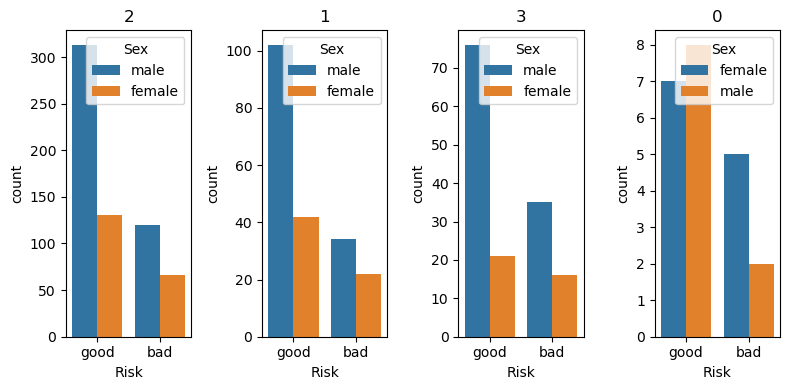

In [27]:
plt.figure(figsize = (8,4))
for i in enumerate(Job):
    plt.subplot(1,4,i[0]+1)
    sns.countplot(x = df[df['Job'] == i[1]]['Risk'], hue = df[df['Job'] == i[1]]['Sex'])
    plt.title(i[1])
plt.tight_layout()

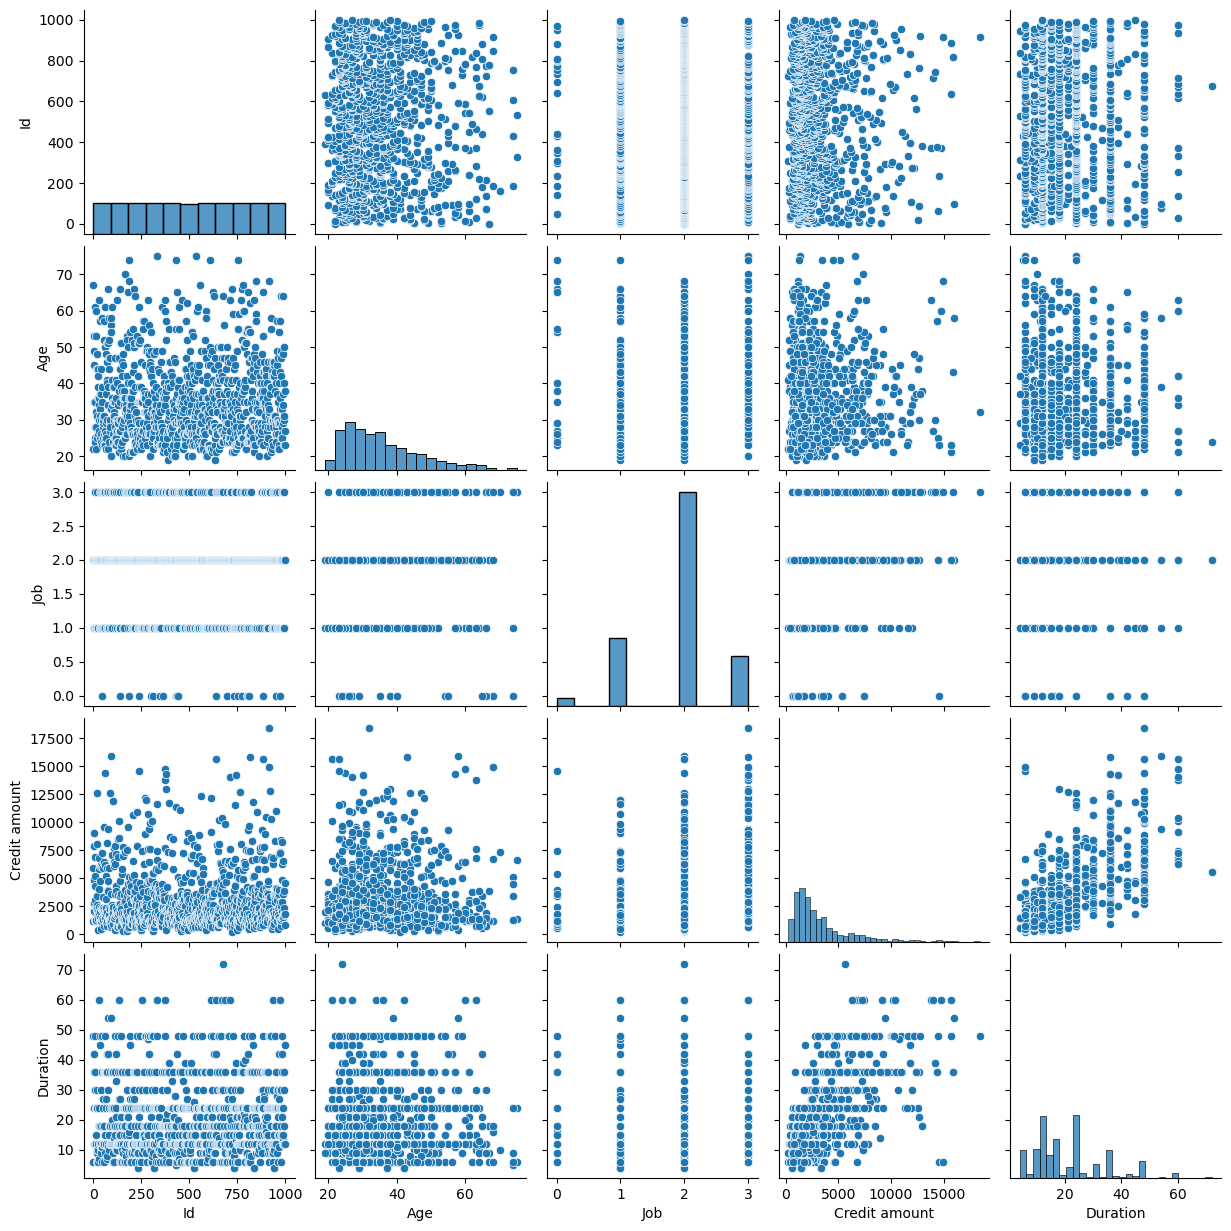

In [28]:
sns.pairplot(df)
plt.show()

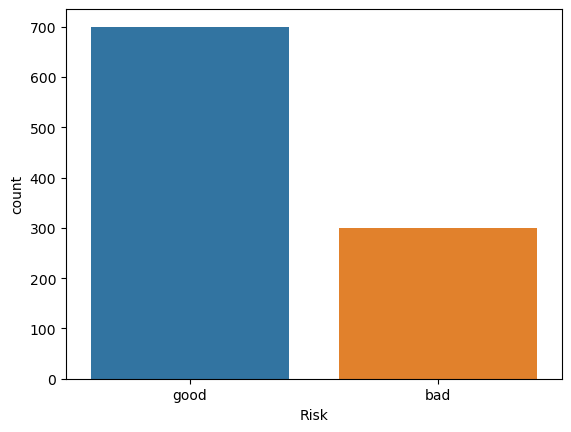

In [29]:
sns.countplot(x=df['Risk'])
plt.show()

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [30]:
newdf = pd.get_dummies(df['Purpose'],drop_first=True)
newdf.head()

,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [31]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Use label encoding for rest of the categorical data

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df['Sex']=le.fit_transform(df['Sex'])
df['Housing']=le.fit_transform(df['Housing'])
df['Saving accounts']=le.fit_transform(df['Saving accounts'])
df['Checking account']=le.fit_transform(df['Checking account'])
df['Risk']=le.fit_transform(df['Risk'])

In [34]:
df.head(1)

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,0,1,1169,6,radio/TV,1


In [35]:
df = df.drop(columns = ['Purpose','Id'])

In [36]:
new_df=pd.concat([df,newdf],axis=1)
new_df.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1,0,1,1169,6,1,0,0,0,0,1,0,0


#### Check the unique values in the new dataframe

In [37]:
unq = new_df.columns

In [38]:
for i in unq:
    print(f"Unique values in {i} are: {new_df[i].unique()}")

Unique values in Age are: [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Unique values in Sex are: [1 0]
Unique values in Job are: [2 1 3 0]
Unique values in Housing are: [1 0 2]
Unique values in Saving accounts are: [0 1 3 4 2]
Unique values in Checking account are: [1 2 0 3]
Unique values in Credit amount are: [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 1594

#### Plot heatmap

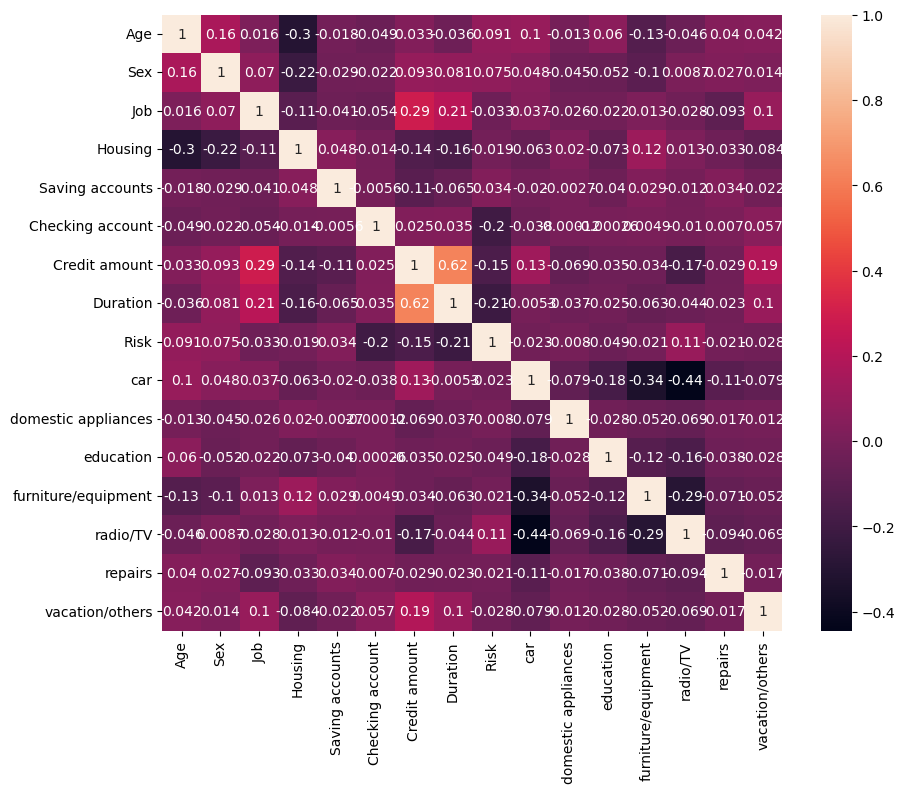

In [39]:
plt.figure(figsize = (10,8))
sns.heatmap(new_df.corr(),annot = True)
plt.show()

#### Select the Dependent(target) and Independent Variables:

In [40]:
X = new_df.drop(columns = ['Risk'])
y = new_df['Risk']

#### Standardize the data

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X  = pd.DataFrame(X_scaled, columns = X.columns)
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,2.766456,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-0.745131,-1.236478,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,-1.491914,0.146949,-0.133710,-0.196609,1.044372,0.949817,2.248194,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.416562,-0.738668,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.634247,1.750384,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,0.670280,0.146949,-2.016956,-0.196609,-0.001045,0.566664,0.256953,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


#### Split the data into training and testing set

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Models:

#### Random Forest Classifier


In [44]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [45]:
model = RandomForestClassifier(n_estimators= 50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [46]:
params ={'max_depth':list(range(1,10)),'n_jobs':[1,2],'random_state':list(range(1,10))}

In [47]:
clf = GridSearchCV(RandomForestClassifier(),params,cv=2,scoring='accuracy')

In [48]:
clf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_jobs': [1, 2],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [49]:
print('Best estimator is:', clf.best_estimator_)
print('Best parameters are:', clf.best_params_)
print('Best score is:',clf.best_score_)

Best estimator is: RandomForestClassifier(max_depth=9, n_jobs=1, random_state=9)
Best parameters are: {'max_depth': 9, 'n_jobs': 1, 'random_state': 9}
Best score is: 0.73


In [50]:
model = RandomForestClassifier(max_depth=7, n_jobs=1, random_state=8)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_jobs=1, random_state=8)

#### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
y_pred = model.predict(X_test)

print('Accuracy score is:', (accuracy_score(y_test,y_pred)))
print('Confusion matrix: \n', (confusion_matrix(y_test,y_pred)))
print('Classification report: \n', (classification_report(y_test,y_pred)))
print(f"Cross val score: {np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train,cv=2))}")

Accuracy score is: 0.77
Confusion matrix: 
 [[ 12  36]
 [ 10 142]]
Classification report: 
               precision    recall  f1-score   support

           0       0.55      0.25      0.34        48
           1       0.80      0.93      0.86       152

    accuracy                           0.77       200
   macro avg       0.67      0.59      0.60       200
weighted avg       0.74      0.77      0.74       200

Cross val score: 0.72


#### Visualize the confusion matrix

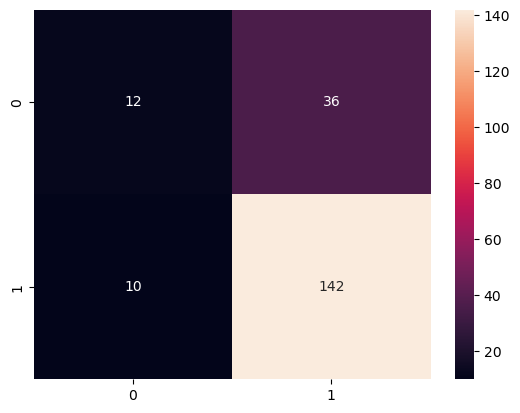

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

#### SupportVectorClassifier

In [54]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [55]:
params = {'C':[0.72,1],'degree':[3,4,5],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [56]:
clf = GridSearchCV(SVC(), params, cv=2)

In [57]:
clf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.72, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [58]:
print('Best estimator is: ', clf.best_estimator_)
print('Best parameters are: ', clf.best_params_)
print('Best score is:',clf.best_score_)

Best estimator is:  SVC(C=1)
Best parameters are:  {'C': 1, 'degree': 3, 'kernel': 'rbf'}
Best score is: 0.69875


In [59]:
model = SVC(C=0.72,degree=3,kernel='rbf')
model.fit(X_train,y_train)

SVC(C=0.72)

In [60]:
y_pred = model.predict(X_test)

print('Accuracy score is:', (accuracy_score(y_test,y_pred)))
print('Confusion matrix: \n', (confusion_matrix(y_test,y_pred)))
print('Classification report: \n', (classification_report(y_test,y_pred)))
print(f"Cross val score: {np.mean(cross_val_score(SVC(),X_train,y_train,cv=2))}")

Accuracy score is: 0.745
Confusion matrix: 
 [[  4  44]
 [  7 145]]
Classification report: 
               precision    recall  f1-score   support

           0       0.36      0.08      0.14        48
           1       0.77      0.95      0.85       152

    accuracy                           0.74       200
   macro avg       0.57      0.52      0.49       200
weighted avg       0.67      0.74      0.68       200

Cross val score: 0.69875


#### LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred = model.predict(X_test)

print('Accuracy score is:', (accuracy_score(y_test,y_pred)))
print('Confusion matrix: \n', (confusion_matrix(y_test,y_pred)))
print('Classification report: \n', (classification_report(y_test,y_pred)))
print(f"Cross val score: {np.mean(cross_val_score(LogisticRegression(),X_train,y_train,cv=2))}")

Accuracy score is: 0.7
Confusion matrix: 
 [[  7  41]
 [ 19 133]]
Classification report: 
               precision    recall  f1-score   support

           0       0.27      0.15      0.19        48
           1       0.76      0.88      0.82       152

    accuracy                           0.70       200
   macro avg       0.52      0.51      0.50       200
weighted avg       0.65      0.70      0.67       200

Cross val score: 0.6975


#### AdaBoost: Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [64]:
y_pred = model.predict(X_test)

print('Accuracy score is:', (accuracy_score(y_test,y_pred)))
print('Confusion matrix: \n', (confusion_matrix(y_test,y_pred)))
print('Classification report: \n', (classification_report(y_test,y_pred)))
print(f"Cross val score: {np.mean(cross_val_score(AdaBoostClassifier(),X_train,y_train,cv=2))}")

Accuracy score is: 0.735
Confusion matrix: 
 [[ 20  28]
 [ 25 127]]
Classification report: 
               precision    recall  f1-score   support

           0       0.44      0.42      0.43        48
           1       0.82      0.84      0.83       152

    accuracy                           0.73       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.73      0.73      0.73       200

Cross val score: 0.70375


#### View scores of the different models 

In [65]:
a1 = np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train,cv=2))
a2 = np.mean(cross_val_score(LogisticRegression(),X_train,y_train,cv=2))
a3 = np.mean(cross_val_score(SVC(),X_train,y_train,cv=2))
a4 = np.mean(cross_val_score(AdaBoostClassifier(),X_train,y_train,cv=2))

In [66]:
n = [a1,a2,a3,a4]

n = pd.DataFrame(n,columns=['Score'])
n = n.sort_values(by= 'Score', ascending = False)

n['Models'] = pd.DataFrame({'Models':['Random Forest Classifier','Logistic Regression','Support Vector Machine','AdaBoost Classifier']})

In [67]:
n

,Score,Models
0,0.71625,Random Forest Classifier
3,0.70375,AdaBoost Classifier
2,0.69875,Support Vector Machine
1,0.69750,Logistic Regression


## ANALYZING THE RESULTS

#### PCA to Speed up Machine Learning Algorithms (Logistic Regression)

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
PCA(n_components=0.95)

PCA(n_components=0.95)

In [69]:
pca = PCA(n_components=5)

In [70]:
train_x = pca.fit_transform(X_train)
test_x = pca.fit_transform(X_test)

**Step 1: Import the model you want to use**

In [71]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [72]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [73]:
logisticRegr.fit(train_x,y_train)

LogisticRegression()

In [74]:
logisticRegr.score(train_x,y_train)

0.6925

In [75]:
#pred = logisticRegr.predict(test_x)

In [76]:
model.score(X_train,y_train)

0.7675

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
y_pred = model.predict(X_test)

print('Accuracy score of our model is :',(accuracy_score(y_test,y_pred)))
print('Confusion matrix is :\n', (confusion_matrix(y_test,y_pred)))
print('Classification report is:\n',(classification_report(y_test,y_pred)))
print(f"Cross val score: {np.mean(cross_val_score( LogisticRegression(),X_train,y_train,cv=2))}")

Accuracy score of our model is : 0.735
Confusion matrix is :
 [[ 20  28]
 [ 25 127]]
Classification report is:
               precision    recall  f1-score   support

           0       0.44      0.42      0.43        48
           1       0.82      0.84      0.83       152

    accuracy                           0.73       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.73      0.73      0.73       200

Cross val score: 0.6975


#### Model Deployment With Tkinter

In [79]:
new_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1,0,1,1169,6,1,0,0,0,0,1,0,0
1,22,0,2,1,1,2,5951,48,0,0,0,0,0,1,0,0
2,49,1,1,1,1,0,2096,12,1,0,0,1,0,0,0,0
3,45,1,2,0,1,1,7882,42,1,0,0,0,1,0,0,0
4,53,1,2,0,1,1,4870,24,0,1,0,0,0,0,0,0


In [80]:
x = new_df.drop(columns =['Saving accounts','Checking account','Credit amount','Duration','Risk','Job'])
y = df['Risk']

In [81]:
x.head(1)

,Age,Sex,Housing,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,1,0,0,0,0,1,0,0


In [82]:
y.head(1)

0    1
Name: Risk, dtype: int32

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [84]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [85]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred = model.predict(x_test)

In [87]:
from tkinter import *
import tkinter as tk
from tkinter.ttk import *
from tkinter.ttk import Combobox

#### Import Tkinter Library

In [88]:
def getprediction():
    age1 = int(age.get())
    gender1 = gender.get()
    housing1 = housing.get()
    purpose1 = purpose.get()

##Gender
    if gender1=='male':
        gender1=0
    else:
        gender1=1

##Housing
    if housing1=='Own':
        own=1
        rent=0
        free=0
    elif housing1=='Rent':
        own=0
        rent=1
        free=0
    else:
        own=0
        rent=0
        free=1
        
##Purpose        
    if purpose1=='car':
        car=1
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
    elif purpose1=='domestic_appliances':
        car=0
        domestic_appliances=1
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
    elif purpose1=='education':
        car=0
        domestic_appliances=0
        education=1
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
    elif purpose1=='furniture_equipment':
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=1
        radio_TV=0
        repairs=0
        vacation_others=0
    elif purpose1=='radio_TV':
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=1
        repairs=0
        vacation_others=0
    elif purpose1=='repairs':
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=1
        vacation_others=0
    else:
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=1
        
    
    
    prediction = model.predict(scaler.transform([[age1,gender1,housing1,car,domestic_appliances,education,furniture_equipment,radio_TV,repairs,vacation_others]]))
    result.delete(0,END)
    
    if prediction[0]==1:
        result.insert(0,'Good Risk')
    elif prediction[0]==0:
        result.insert(0,'Bad Risk') 

In [89]:
top = tk.Tk()
top.geometry('7000x7000')
top.title('German Credit Risk Analysis')
label = Label(top , text = 'ENTER THE DETAILS', font=('calibre',20, 'bold')).pack()

##Age
Label(top).pack()
age_label=Label(top,text='AGE').pack()
age=Entry(top)
age.pack()

##Gender
Label(top).pack()
gender_label=Label(top,text='GENDER').pack()
gender=Combobox(top)
gender['values']=('Male','Female')
gender.current(0)
gender.pack()

##Housing
Label(top).pack()
housing=StringVar()
housing.set(1)
housinglabel=Label(top,text='HOUSING TYPE').pack()
house=Combobox(top)
house['values']=('Own','Rent','Free')
house.current(0)
house.pack()

##Purpose
Label(top).pack()
purpose=StringVar()
purpose.set(1)
purposelabel=Label(top,text='PURPOSE FOR TAKING LOAN').pack()
purp=Combobox(top)
purp['values']=('car','domestic appliances','education','furniture/equipment','radio/TV','repairs','vacation/others')
purp.current(0)
purp.pack()

Label(top).pack()               
button = Button(top,text='GET PREDICTION',command=getprediction).pack()

result = Entry(top)
result.pack()

top.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\chris\AppData\Local\Temp\ipykernel_10824\3963380201.py", line 2, in getprediction
    age1 = int(age.get())
ValueError: invalid literal for int() with base 10: ''
D:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
